<a href="https://colab.research.google.com/github/aasthadawar02/TME_6015/blob/main/Assignment2_Hugging_Face_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
import tensorflow_datasets as tfds
import pandas as pd

In [2]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import accuracy_score

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
train_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Pets_Dataset_HuggingFace/train"

train_data = tf.keras.utils.image_dataset_from_directory(train_directory,
                                                         validation_split=None,
                                                         image_size=(128, 128),
                                                         batch_size=16)

Found 900 files belonging to 3 classes.


In [5]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
validation_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Pets_Dataset_HuggingFace/test"
validation_data = tf.keras.utils.image_dataset_from_directory(validation_directory,
                                                         validation_split=None,
                                                         image_size=(128, 128),
                                                         batch_size=16)

Found 150 files belonging to 3 classes.


In [7]:
validation_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [9]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"

feature_extractor = hub.KerasLayer(model_handle,
                                   trainable=True)
num_class = 3
model = tf.keras.Sequential(
    [
        normalization_layer,
        feature_extractor,
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 128, 128, 3])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 3)                 3006      
                                                                 
Total params: 1695495 (6.47 MB)
Trainable params: 1681415 (6.41 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [11]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [12]:
EPOCHS = 25
history = model.fit(train_data,
                    epochs=EPOCHS,
                    validation_data=validation_data)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 108s 1s/step - loss: 1.9508 - accuracy: 0.8111 - val_loss: 9.6377 - val_accuracy: 0.7400
Epoch 2/25
57/57 [==============================] - 13s 230ms/step - loss: 0.5706 - accuracy: 0.9078 - val_loss: 4.5606 - val_accuracy: 0.7933
Epoch 3/25
57/57 [==============================] - 14s 242ms/step - loss: 0.3727 - accuracy: 0.9356 - val_loss: 3.2008 - val_accuracy: 0.7800
Epoch 4/25
57/57 [==============================] - 13s 227ms/step - loss: 0.3239 - accuracy: 0.9456 - val_loss: 0.5828 - val_accuracy: 0.9000
Epoch 5/25
57/57 [==============================] - 13s 229ms/step - loss: 0.2220 - accuracy: 0.9667 - val_loss: 0.7814 - val_accuracy: 0.8600
Epoch 6/25
57/57 [==============================] - 13s 228ms/step - loss: 0.4022 - accuracy: 0.9378 - val_loss: 1.0239 - val_accuracy: 0.8733
Epoch 7/25
57/57 [==============================] - 13s 230ms/step - loss: 0.6757 - accuracy: 0.8900 - val_loss: 1.0199 - val_accuracy: 0.8267
Epoch 8/25
5

10/10 [==============================] - 1s 33ms/step - loss: 0.5113 - accuracy: 0.8533


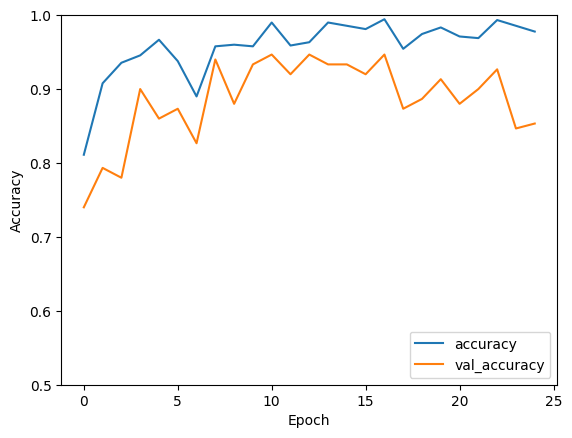

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_data)

In [14]:
print(test_acc)

0.8533333539962769


In [15]:
images=[]
labels=[]
for image, label in validation_data:
  images.extend(image.numpy())
  labels.extend(label.numpy())
predicted_labels = model.predict(np.array(images))
predicted_labels = list(map(lambda val : np.argmax(val), predicted_labels))
len(predicted_labels)

5/5 [==============================] - 1s 95ms/step


150

In [16]:
len(predicted_labels)

150

In [17]:
num_classes = ["cat","dog","rabbit"]

**few examples of the predicted output**

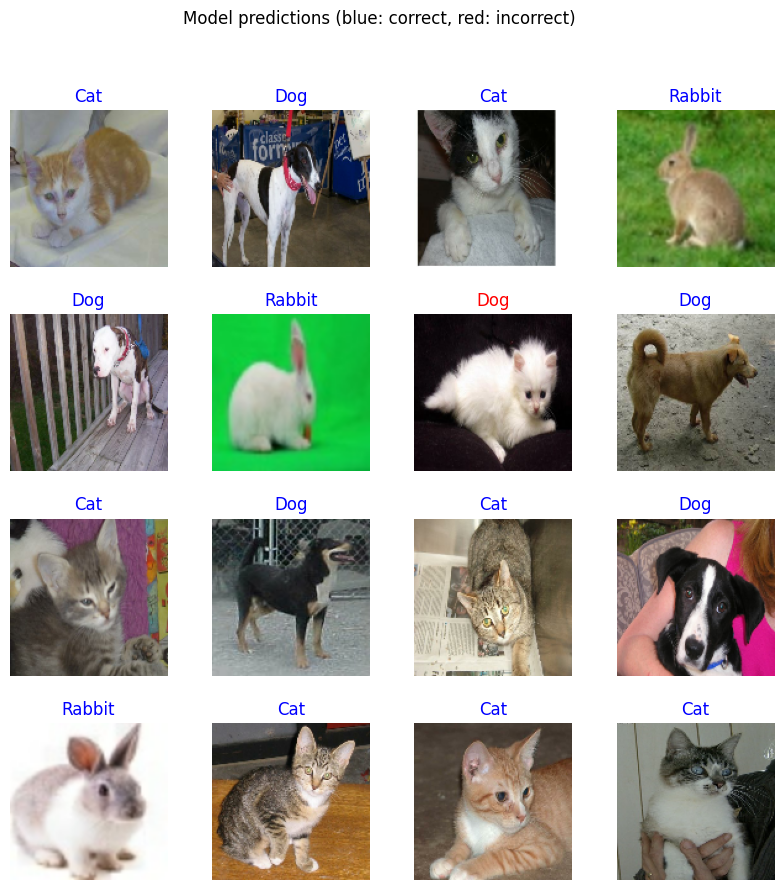

In [18]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(images[i].astype("uint8"))
    color = "blue" if predicted_labels[i] == labels[i] else "red"
    plt.title(num_classes[predicted_labels[i]].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [20]:
print(classification_report(labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74        50
           1       0.72      0.92      0.81        50
           2       1.00      1.00      1.00        50

    accuracy                           0.85       150
   macro avg       0.87      0.85      0.85       150
weighted avg       0.87      0.85      0.85       150



**results of the prediction results using a confusion matrix**

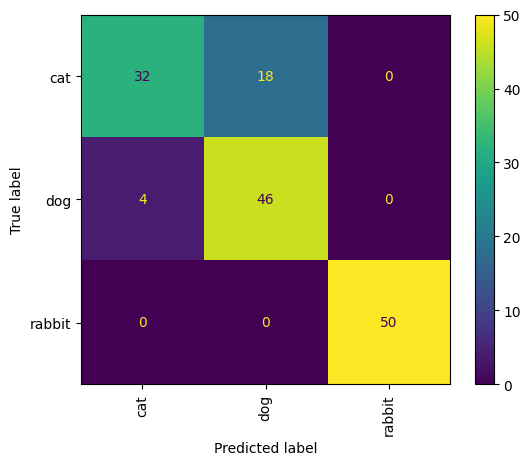

In [21]:
ConfusionMatrixDisplay.from_predictions(labels, predicted_labels, display_labels=num_classes, xticks_rotation="vertical")
plt.show()